In [1]:
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt
from pykat import finesse
from pykat.commands import *
from IPython.display import HTML, display

%matplotlib inline

pykat.init_pykat_plotting(dpi=90)


                                              ..-
    PyKat 1.1.297         _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



In [70]:
basekat = finesse.kat()
basekat.verbose = False

basecode = """
const Pin 1M
const LX 4000
const LY 4000

l laser $Pin 0 n0
s s1 1 n0 nbs
bs BS 0.5 0.5 0 45 nbs nbsY nbsX nbsd

s LX $LX nbsX nmX1
m mX 1 0 0 nmX1 nmX2


s LY $LY nbsY nmY1
m mY 1 0 0 nmY1 nmY2

s sout 1 nbsd nout 
"""

basekat.parse(basecode)

In [49]:
kat1 = deepcopy(basekat)
code = """


pd pout nout

xaxis mX phi lin -90 90 200

put* mY phi $mx1

yaxis abs
"""
kat1.parse(code)

out1 = kat1.run()

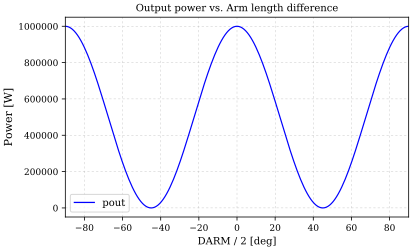

In [50]:
fig1 = out1.plot(xlabel = "DARM / 2 [deg]", 
                 ylabel = "Power [W]", 
                 title = "Output power vs. Arm length difference")

In [51]:
#MAKE THE OUTPUT OF THE MICHELSON ZERO

kat2 = deepcopy(kat1)

kat2.mY.phi = 90

out2 = kat2.run()

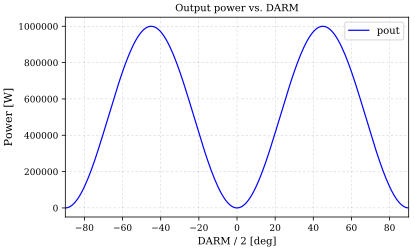

In [52]:
fig2 = out2.plot(xlabel = "DARM / 2 [deg]", 
                 ylabel = "Power [W]", 
                 title = "Output power vs. DARM")

In [8]:
#Make the offset power of the Michelson 10mW

In [55]:
kat3 = deepcopy(basekat)

kat3.mY.phi = 90

code3 = """
pd pout nout

noxaxis
yaxis abs
"""

kat3.parse(code3)

out_test = kat3.run()
print('Pout = {0} W'.format(out_test['pout']))

Pout = 3.74939945665464e-27 W


In [56]:
kat4 = deepcopy(kat3)
#Writing a minimization function
def f(x): 
    kat4.mX.phi = x
    out4 = kat4.run()
    print ('Tuning: {0} \t \t Power: {1}'.format(x, out4['pout']))
    return np.abs(out4['pout']-.01)

In [58]:
import scipy.optimize as op

sol = op.minimize_scalar(f, method = "Bounded", bounds= (0,1), options={'maxiter' : 100,'xatol' : 1e-05})

detuning = sol.x

print()
print('Success: {0} {1}'.format(sol.success, sol.message))

Tuning: 0.3819660112501051 	 	 Power: 44.4424242010141
Tuning: 0.6180339887498948 	 	 Power: 116.348988150856
Tuning: 0.2360679774997897 	 	 Power: 16.9756509272537
Tuning: 0.14589803375031546 	 	 Power: 6.48414434936049
Tuning: 0.09016994374947425 	 	 Power: 2.47672606192964
Tuning: 0.055728090000841224 	 	 Power: 0.946025657528926
Tuning: 0.03444185374863304 	 	 Power: 0.361349717370799
Tuning: 0.0212862362522082 	 	 Power: 0.138023320485246
Tuning: 0.013155617496424847 	 	 Power: 0.0527202186843213
Tuning: 0.008130618755783355 	 	 Power: 0.0201373318618009
Tuning: 0.0050249987406414945 	 	 Power: 0.00769177636038533
Tuning: 0.003991915858772995 	 	 Power: 0.00485419805457298
Tuning: 0.005587477045705848 	 	 Power: 0.00951012527353279
Tuning: 0.0065588707407479244 	 	 Power: 0.0131042713518028
Tuning: 0.005724747878595656 	 	 Power: 0.00998314693900542
Tuning: 0.006043354461144479 	 	 Power: 0.0111252779218936
Tuning: 0.005769537454130088 	 	 Power: 0.0101399713455592
Tuning: 0.00570

In [59]:
kat5 = deepcopy(kat3)
kat5.mY.phi = kat5.mY.phi.value + detuning

out5 = kat5.run()

print('Pout = {} mW'.format(1000.0*out5['pout']))

Pout = 10.0013329711608 mW


In [13]:
#essentially defined a function whose difference with the power of the michaelson is at a minimum at 10 mW. 
#We then use this the minimization function in python to find this exact minimum and outputs a detuning angle (/length)
#Once we find this detuning angle, then we double check what the power

In [14]:
#MACROSCOPIC LENGTH CHANGE IN THE MICHELSON

In [61]:
kat6 = deepcopy(basekat)

code6 = """

pd pout nout


xaxis* LX L lin -1000 1000 200
func ylen = 4000 - $x1

put* LY L $ylen

yaxis abs

noplot ylen

"""

kat6.parse(code6)
out6 = kat6.run()

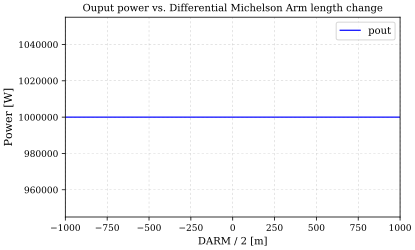

In [62]:
fig3 = out6.plot(ylabel='Power [W]', 
                 xlabel='DARM / 2 [m]',
                 title='Ouput power vs. Differential Michelson Arm length change')

In [17]:
#Change in the Michelson as a response to a change in frequency 

In [66]:
#Frequency offset #1
kat7 = deepcopy(kat1)
kat7.lambda0 = 1550e-9

code7 = """

pd pout nout


xaxis* LX L lin -1000 1000 200
func ylen = 4000 - $x1

put* LY L $ylen

yaxis abs

noplot ylen

"""

kat7.parse(code7)
out7 = kat7.run()


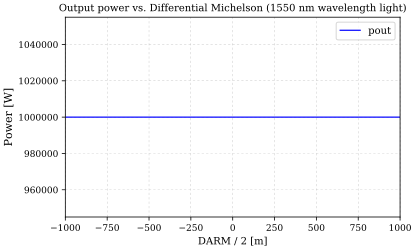

In [65]:
fig7 = out7.plot(ylabel = 'Power [W]', 
                 xlabel = 'DARM / 2 [m]', 
                 title = 'Output power vs. Differential Michelson (1550 nm wavelength light)')

In [68]:
#Frequency offset #2
kat8 = deepcopy(basekat)
kat8.laser.f = 1.0e5 #setting offset frequency to 100 kHz
code8 = """
pd pout nout

xaxis* LX L lin -1000 1000 200
func ylen = 4000-$x1

put* LY L $ylen

yaxis abs

noplot ylen

"""

kat8.parse(code8)
out8 = kat8.run()



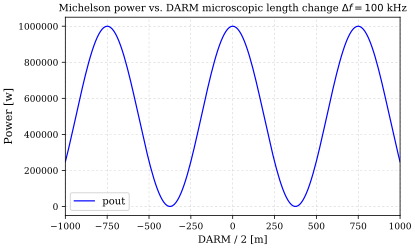

In [69]:
fig8 = out8.plot(ylabel = "Power [w]", 
                 xlabel = "DARM / 2 [m]", 
                 title = 'Michelson power vs. DARM microscopic length change $\Delta f = 100$ kHz')